# <h1><b><u> ANALYSIS OF COVID-19 DATASET </u></b></h1> 

<h3>
This dataset includes Number of Confirmed cases,Deaths and Recovered cases ,  <br> every day across the globe during the time period(01-01-2020 to 31-07-2020)
</h3>

### We will be Analysing day to day the number of cases country wise.
#### <u><b> File name - covid.csv (rows = 35156  ,columns = 10) </b></u>
#### Columns included in this dataset
<ul>
<li>Date</li>
<li>Country/Region</li>
<li>Confirmed</li>
<li>Deaths</li>
<li>Recovered</li>
<li>Active</li>
<li>New cases</li>
<li>New deaths</li>
<li>New recovered</li>
<li>WHO Region</li>
</ul>

## Modules that are required for data analysis and visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Loading a dataset into the Data frame 

In [2]:
covid_df = pd.read_csv('DATASETS/covid.csv')

### Deleting 'WHO Region' column not required for analysis

In [3]:
covid_df.drop(columns=['WHO Region'],inplace=True)
# When inplace = True is used, it performs operation on data and nothing is returned.
# And makes permanent changes in dataframe.

### Renaming columns ('Country/Region','New cases','New deaths','New recoverd')
#### That it can be easily accessed by data frame object

In [4]:

covid_df.rename(columns={'Country/Region' : 'Country','New cases' : 'NewCases','New deaths' : 'NewDeaths',
                         'New recovered' : 'NewRecovered'},inplace=True)

### Extracting month and weekday column from Date column for better and detailed analysis

In [5]:
covid_df['month'] = pd.DatetimeIndex(covid_df.Date).month
covid_df['weekday'] = pd.DatetimeIndex(covid_df.Date).weekday

### Deleting 'Date' column because not required in further analysis

In [6]:
covid_df.drop(columns=['Date'],inplace=True)

<h2><u><b> 
We cleaned the Dataset and now we can perform some queries on covid_df
</b></u></h2>

<h3>Now the Dataset contains the following columns.</h3>
<ul>
<li>Country</li>       
<li>Confirmed</li>     
<li>Deaths</li>        
<li>Recovered</li>     
<li>Active</li>        
<li>NewCases</li>      
<li>NewDeaths</li>     
<li>NewRecovered</li> 
<li>month</li>
<li>weekday</li> 
<ul>

### Query 1: Plot a graph to visualize the total number of NewDeaths and NewCases in all months all over the world.

In [7]:
TotalDeaths = covid_df.groupby('month')['NewDeaths'].sum()
TotalCases = covid_df.groupby('month')['NewCases'].sum()

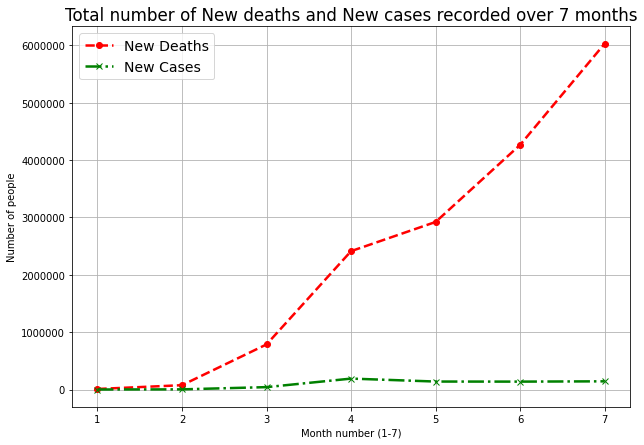

In [8]:
plt.figure(figsize=(10,7))
plt.grid('darkgrid')
plt.rcParams['font.size'] = 14
plt.ticklabel_format(style='plain')
plt.title('Total number of New deaths and New cases recorded over 7 months')
plt.ylabel('Number of people')
plt.xlabel('Month number (1-7)')
plt.plot(TotalDeaths.index,TotalCases,marker='o',c='r',lw=2.5,ls='--',label='New Deaths');
plt.plot(TotalDeaths.index,TotalDeaths,marker='x',c='g',lw=2.5,ls='-.',label='New Cases');
plt.legend();


### Query 2: Depict a graphical representation of the Average of NewDeaths ,NewCases,NewRecovered persons in a weekday all over the world.

In [9]:
AverageData = covid_df.groupby('weekday')[['NewDeaths','NewCases','NewRecovered']].mean()
AverageData

,NewDeaths,NewCases,NewRecovered
weekday,,,
0,15.032482,427.345811,272.830263
1,21.100370,451.504731,265.229535
2,20.713409,470.511983,274.491384
3,21.222816,500.169539,286.177263
4,20.623094,510.568231,281.389186
5,17.616756,487.109527,289.696376
6,14.006932,437.674985,215.243811


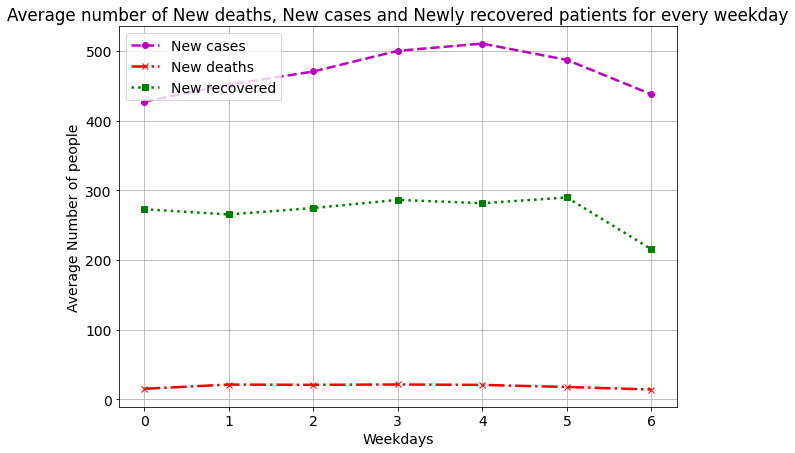

In [10]:
plt.figure(figsize=(10,7))
plt.grid('darkgrid')
plt.rcParams['font.size'] = 14
plt.title('Average number of New deaths, New cases and Newly recovered patients for every weekday')
plt.ylabel('Average Number of people')
plt.xlabel('Weekdays')
plt.plot(AverageData.index,AverageData.NewCases,lw=2.5,marker='o',ls='--',c='m',label='New cases');
plt.plot(AverageData.index,AverageData.NewDeaths,lw=2.5,marker='x',ls='-.',c='r',label='New deaths');
plt.plot(AverageData.index,AverageData.NewRecovered,lw=2.5,marker='s',ls=':',c='g',label='New recovered');
plt.legend();


### Query 3: Visualize a plot showing the total sum of deaths and sum of confirmed cases <br> for country 'India' from March to July.

In [11]:
# filter data by months
DataFromMarToSep = covid_df[covid_df.month>=3]

# get india data
IndiaData = DataFromMarToSep[DataFromMarToSep.Country == 'India']

# India covid data
IndiaCovidData = IndiaData.groupby('month')[['Deaths','Confirmed']].sum()

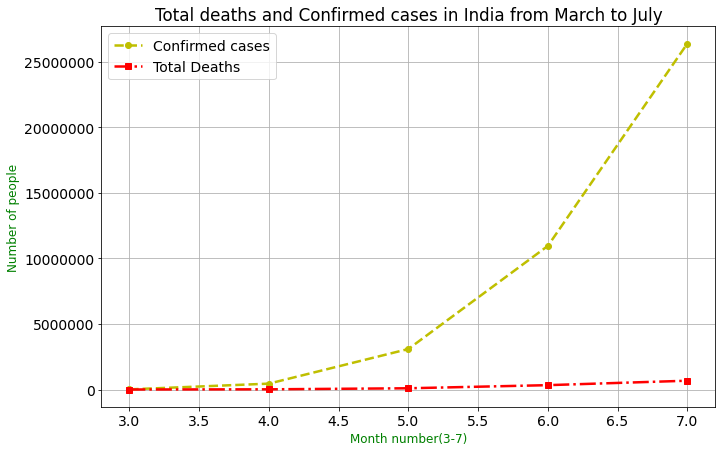

In [12]:
plt.figure(figsize=(11,7))
plt.grid('darkgrid')
plt.rcParams['font.size'] = 14
plt.title('Total deaths and Confirmed cases in India from March to July')
plt.ylabel('Number of people',fontsize=12,c='g')
plt.xlabel('Month number(3-7)',fontsize=12,c='g')
plt.ticklabel_format(style='plain')
plt.plot(IndiaCovidData.index,IndiaCovidData.Confirmed,lw=2.5,marker='o',ls='--',c='y',label='Confirmed cases');
plt.plot(IndiaCovidData.index,IndiaCovidData.Deaths,lw=2.5,marker='s',ls='-.',c='r',label='Total Deaths');
plt.legend();

### Query 3: To depict Worst 3 Affected countries by COVID-19 in the month of June  through graphical representation 

In [13]:
# filter june covid data
data_june = covid_df[covid_df.month == 6]

# sort data on basis of deaths
grouped_data = data_june.groupby('Country')[['Confirmed','Deaths']].sum()

# group by countries
Worst3AffectedCountries = grouped_data.sort_values(['Confirmed','Deaths'],ascending=False).head(3)

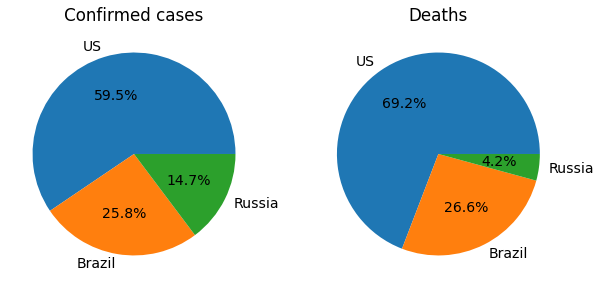

In [14]:
# subplots
fig,graph = plt.subplots(1,2,figsize=(10,7));
graph[0].set_title('Confirmed cases')
graph[0].pie(Worst3AffectedCountries.Confirmed,autopct='%1.1f%%',labels=Worst3AffectedCountries.index);
graph[1].set_title('Deaths')
graph[1].pie(Worst3AffectedCountries.Deaths,autopct='%1.1f%%',labels=Worst3AffectedCountries.index);

### Query 4: Plot a graph depicting Top 5 countries with highest Recovery rate.

In [15]:
# sort data on basis of deaths
recovery_rate = covid_df.groupby('Country')[['Recovered']].mean()

# group by countries
Top5Recovered = recovery_rate.sort_values('Recovered',ascending=False).head(5)

# percentage
per_rate = (Top5Recovered/Top5Recovered.sum())*100

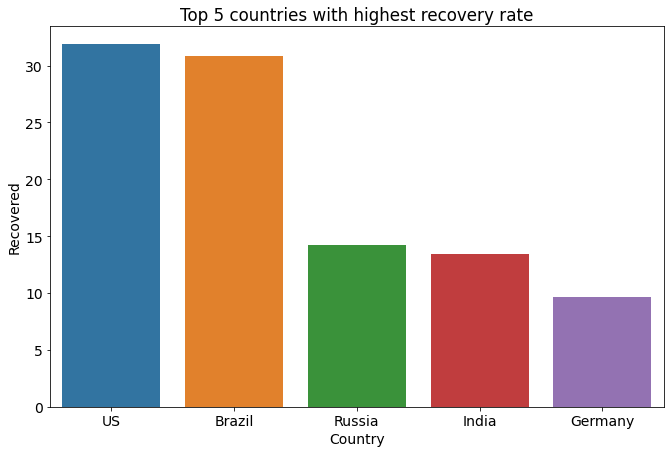

In [16]:
plt.figure(figsize=(11,7));
plt.rcParams['font.size'] = 14
plt.xlabel('Countries')
plt.ylabel('Percentage Recovery rate')
plt.title('Top 5 countries with highest recovery rate');
sns.barplot(data=per_rate,x=per_rate.index,y=per_rate.Recovered);

### Query 5: Graphical representation for daily increase in mortality,for China over the period(Jan-July 2020)

In [17]:
# filter data by country china
FilteredData = covid_df[covid_df.Country == 'China']

ChinaDeathData = FilteredData[['Deaths','weekday']]

ChinaDeathData = ChinaDeathData.reset_index()

In [18]:
ChinaDeathData

,index,Deaths,weekday
0,36,17,2
1,223,18,3
2,410,26,4
3,597,42,5
4,784,56,6
...,...,...,...
183,34257,4649,3
184,34444,4650,4
185,34631,4652,5
186,34818,4652,6


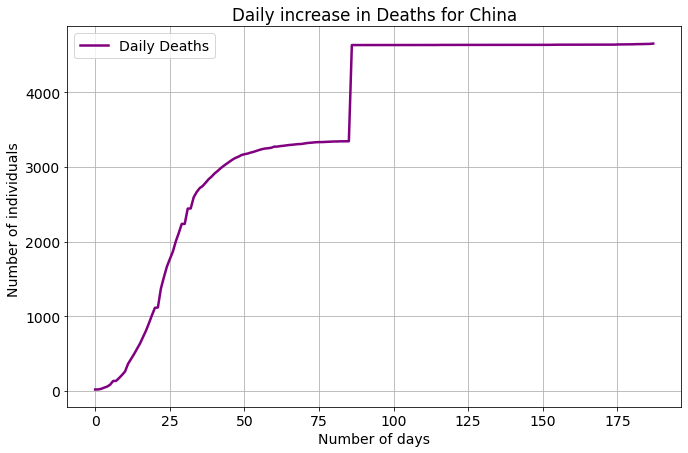

In [19]:
plt.figure(figsize=(11,7))
plt.grid('darkgrid')
plt.rcParams['font.size'] = 14
plt.title('Daily increase in Deaths for China')
plt.ylabel('Number of individuals ')
plt.xlabel('Number of days')
plt.ticklabel_format(style='plain')
plt.plot(ChinaDeathData.index,ChinaDeathData.Deaths,lw=2.5,c='purple',ls='-',label='Daily Deaths');
plt.legend();

### Query 6: Plot a graph to visualize the Increase in Mortality rate every month all across the globe.


In [20]:
DeathRate = covid_df.groupby('month')[['Deaths']].mean()

rate = (DeathRate/DeathRate.sum())*100

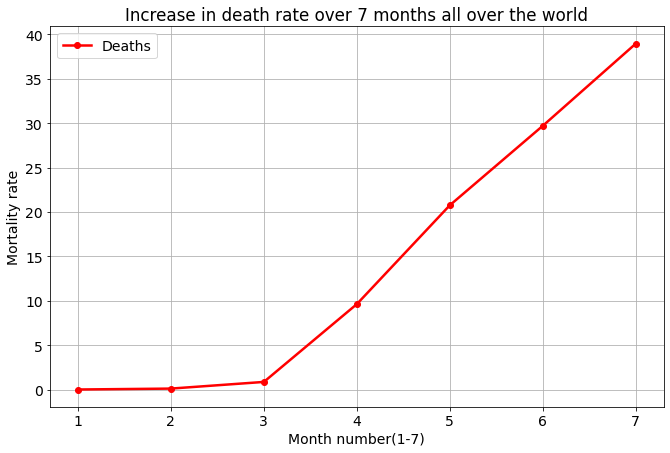

In [21]:
plt.figure(figsize=(11,7))
plt.grid('darkgrid')
plt.rcParams['font.size'] = 14
plt.title('Increase in death rate over 7 months all over the world')
plt.ylabel('Mortality rate')
plt.xlabel('Month number(1-7)')
plt.ticklabel_format(style='plain')
plt.plot(rate.index,rate.Deaths,lw=2.5,marker='o',ls='-',c='r',label='Deaths');
plt.legend();

### Query 7: Display Maximum number of  Active cases for each country over the period Jan to July.

In [22]:
ActiveDf = covid_df.groupby('Country')[['Active']].max()

#### Depicting the Maximum count of active cases for random 10 countries.

In [23]:
ActiveDf.sort_values('Active',ascending=False).sample(10) 

,Active
Country,
Bosnia and Herzegovina,5274
Laos,19
Iceland,1096
Italy,108257
Malaysia,2596
Philippines,53649
Mauritius,286
Ireland,14888
Antigua and Barbuda,44


### Query 8: Plot a graph visualizing the Daily increase in Confirmed Cases for country India. 

In [24]:
# filter data by country china
FilteredData = covid_df[covid_df.Country == 'India']

IndiaConfirmedData = FilteredData[['Confirmed']]

IndiaConfirmedData = IndiaConfirmedData.reset_index()

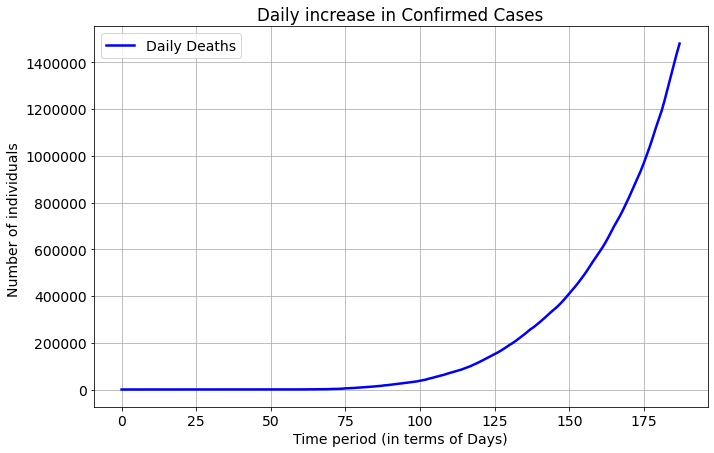

In [25]:
plt.figure(figsize=(11,7))
plt.grid('darkgrid')
plt.rcParams['font.size'] = 14
plt.title('Daily increase in Confirmed Cases')
plt.ylabel('Number of individuals ')
plt.xlabel('Time period (in terms of Days)')
plt.ticklabel_format(style='plain')
plt.plot(IndiaConfirmedData.index,IndiaConfirmedData.Confirmed,lw=2.5,c='b',ls='-',label='Daily Deaths');
plt.legend();

### Query 9: Plot a graph depicting summation of fields including Active cases, Deaths and Recovered; <br> for all those countries beginning  with letter 'A'.

In [26]:
# filter data
Countries = covid_df[covid_df.Country.str.startswith('A')]

GroupedData = Countries.groupby('Country')[['Active','Deaths','Recovered']].sum()

Active = GroupedData.Active.sum()
Deaths = GroupedData.Deaths.sum()
Recovered = GroupedData.Recovered.sum()

List = [Active,Deaths,Recovered]

In [27]:
List

[5898202, 361502, 7342477]

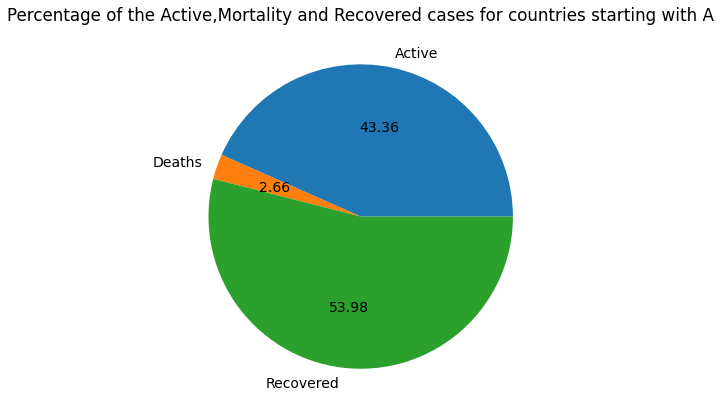

In [28]:
plt.figure(figsize=(10,7))
plt.title('Percentage of the Active,Mortality and Recovered cases for countries starting with A')
plt.rcParams['font.size'] = 14
plt.pie(List,autopct='%1.2f',labels=['Active','Deaths','Recovered']);

### Query 10: Visualize a graph depicting first 5 countries that had maximum number of Active cases,<br> in the month of 'July' with weekday 1.

In [29]:
# filter data
Flt = covid_df.loc[(covid_df.month == 7) & (covid_df.weekday == 1)]

Grp = Flt.groupby('Country')[['Active']].sum()

Sorted = Grp.sort_values('Active',ascending=False).head(5)

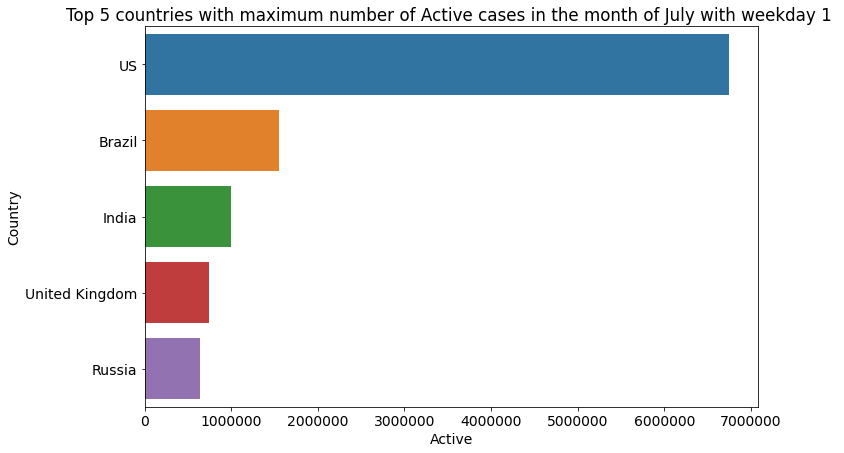

In [30]:
plt.figure(figsize=(11,7));
plt.rcParams['font.size'] = 14
plt.title("Top 5 countries with maximum number of Active cases in the month of July with weekday 1 ")
plt.xlabel('Countries')
plt.ticklabel_format(style='plain')
plt.ylabel('Active number of cases')
sns.barplot(data=Sorted,x=Sorted.Active,y=Sorted.index);